In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
sample_id = 'NA12878'
win_size = 1000

In [3]:
online_call_base_dir = '/zfssz2/ST_MCHRI/BIGDATA/PROJECT/NIPT_CNV/1dcnn_resnet/online_call'
gtruth_cnv_base_dir = '/zfssz6/ST_MCHRI/BIGDATA/P18Z10200N0124/NIPT_CNV/NIPT_CNV/1k_cnvs_lab_feat'

online_call_res_fn = os.path.join(online_call_base_dir, 
                                  'b256_e50_lr0.001_dr0.5_fc128_blk443-cnvnet_'+
                                  sample_id+'.online_cnv_call')

gtruth_fn = os.path.join(gtruth_cnv_base_dir, 'ALL.wgs.mergedSV.v8.20130502.svs.genotypes.GRCh38.vcf.' +
        sample_id + '.cnvs.labels')


In [6]:
gtruth_cnv_pd = pd.read_csv(gtruth_fn, sep='\t')
gtruth_cnv_pd = gtruth_cnv_pd[gtruth_cnv_pd['CHROM']=='1']
print(len(gtruth_cnv_pd))
gtruth_cnv_pd.head(100)

107


,CHROM,ID,POS,END,SVLEN,ALT,SVTYPE,AF,SMP_GT,ADJTYPE,ADJAF
0,1,DEL_pindel_129,4144607,4144657,50,A,DEL,0.485623,"NA12878,1|0",DEL,0.485623
1,1,BI_GS_DEL1_B5_P0008_654,7510014,7511461,1447,<CN0>,DEL,0.161741,"NA12878,1|0",DEL,0.161741
2,1,YL_CN_GBR_48,9535301,9537810,2509,<CN0>,DEL,0.219249,"NA12878,1|0",DEL,0.219249
3,1,UW_VH_0,10422442,10423733,1291,<CN0>,DEL,0.329273,"NA12878,0|1",DEL,0.329273
4,1,UW_VH_58,11622816,11623132,316,<CN0>,DEL,0.505591,"NA12878,1|0",DEL,0.505591
5,1,YL_CN_FIN_64,15825187,15829137,3950,<CN0>,DEL,0.23742,"NA12878,1|0",DEL,0.237420
6,1,DUP_gs_CNV_1_17026064_17052112,16699569,16725617,26048,"<CN2>,<CN3>,<CN4>,<CN5>",CNV,"0.292133,0.439696,0.0587061,0.0113818","NA12878,2|0",DUP,0.439696
7,1,BI_GS_DEL1_B3_P0022_20,21459925,21460202,277,<CN0>,DEL,0.713858,"NA12878,1|1",DEL,0.713858
8,1,DUP_gs_CNV_1_25592642_25661222,25266151,25334731,68580,"<CN0>,<CN2>",CNV,"0.20607,0.00219649","NA12878,1|0",DEL,0.206070
9,1,DEL_pindel_417,30771803,30771897,94,A,DEL,0.315895,"NA12878,0|1",DEL,0.315895


In [191]:
gtruth_cnv_pd.sort_values(by=['CHROM','POS'],inplace=True)
gtruth_cnv_pd.reset_index(drop=True, inplace=True)

adjstart = np.floor(gtruth_cnv_pd['POS'].values*1.0/win_size) * win_size+1
adjstart = adjstart.astype('int')
gtruth_cnv_pd['ADJPOS']= adjstart
adjend = np.ceil(gtruth_cnv_pd['END'].values*1.0/win_size) * win_size
adjend = adjend.astype('int')
gtruth_cnv_pd['ADJEND'] = adjend
gtruth_cnv_pd['NWIN']=(gtruth_cnv_pd['ADJEND']-gtruth_cnv_pd['ADJPOS']+1)//win_size 
gtruth_cnv_pd.head()

,CHROM,ID,POS,END,SVLEN,ALT,SVTYPE,AF,SMP_GT,ADJTYPE,ADJAF,ADJPOS,ADJEND,NWIN
0,1,DEL_pindel_98,3181807,3181925,118,C,DEL,0.119209,"HG01777,1|0",DEL,0.119209,3181001,3182000,1
1,1,DEL_pindel_129,4144607,4144657,50,A,DEL,0.485623,"HG01777,0|1",DEL,0.485623,4144001,4145000,1
2,1,BI_GS_DEL1_B5_P0008_654,7510014,7511461,1447,<CN0>,DEL,0.161741,"HG01777,1|0",DEL,0.161741,7510001,7512000,2
3,1,UW_VH_58,11622816,11623132,316,<CN0>,DEL,0.505591,"HG01777,1|0",DEL,0.505591,11622001,11624000,2
4,1,YL_CN_FIN_64,15825187,15829137,3950,<CN0>,DEL,0.23742,"HG01777,1|1",DEL,0.237420,15825001,15830000,5


In [200]:
online_call_pd = pd.read_csv(online_call_res_fn, sep='\t', header=None)
online_call_pd.columns = ['chr', 'start', 'end', 'length', 'indicator', 'prob', 'pred']
# 1: 'DEL', 2: 'DUP', 0: 'NEU' 

online_call_pd['truth']=0
online_call_pd['ID']=''
online_call_pd['svlen']=0
online_call_pd['POS']=0
online_call_pd['END']=0

for i,x in gtruth_cnv_pd.iterrows():
    online_call_pd.loc[(online_call_pd['start']>=x['ADJPOS']) 
                       & (online_call_pd['end']<=x['ADJEND']),'truth'] = 1 if x['ADJTYPE'] == 'DEL' else 2 if x['ADJTYPE'] == 'DUP' else 0 
    online_call_pd.loc[(online_call_pd['start']>=x['ADJPOS']) 
                       & (online_call_pd['end']<=x['ADJEND']),'ID'] = x['ID']
    online_call_pd.loc[(online_call_pd['start']>=x['ADJPOS']) 
                       & (online_call_pd['end']<=x['ADJEND']),'svlen'] = int(x['SVLEN'])
    online_call_pd.loc[(online_call_pd['start']>=x['ADJPOS']) 
                       & (online_call_pd['end']<=x['ADJEND']),'POS'] = x['POS']
    online_call_pd.loc[(online_call_pd['start']>=x['ADJPOS']) 
                       & (online_call_pd['end']<=x['ADJEND']),'END'] = int(x['END'])
    
    

In [201]:
# This should be double-checked to make sure it is correct.

online_call_pd.loc[(online_call_pd['indicator']==1) | (online_call_pd['indicator']==2), 'pred']='0'
online_call_pd.loc[(online_call_pd['indicator']==1) | (online_call_pd['indicator']==2), 'truth']=0

online_call_pd_predicable = online_call_pd[online_call_pd['indicator']==3]


In [202]:
online_call_pd_predicable.head()

,chr,start,end,length,indicator,prob,pred,truth,ID,svlen,POS,END
1,1,10000,11000,1000,3,"0.000001,0.999730,0.000269",1,0,,0,0,0
2,1,11000,12000,1000,3,"0.046210,0.108301,0.845489",2,0,,0,0,0
3,1,12000,13000,1000,3,"0.000003,0.000029,0.999968",2,0,,0,0,0
4,1,13000,14000,1000,3,"0.092253,0.802491,0.105255",1,0,,0,0,0
5,1,14000,15000,1000,3,"0.483382,0.513718,0.002900",1,0,,0,0,0


In [203]:
online_call_pd_predicable2 = online_call_pd_predicable[online_call_pd_predicable['ID']=='DUP_gs_CNV_1_17026064_17052112' ]
online_call_pd_predicable2.head(100)

,chr,start,end,length,indicator,prob,pred,truth,ID,svlen,POS,END
16455,1,16699384,16700384,1000,3,"0.656984,0.007315,0.335701",0,2,DUP_gs_CNV_1_17026064_17052112,26048,16699569,16725617
16456,1,16700384,16701384,1000,3,"0.188422,0.365628,0.445950",2,2,DUP_gs_CNV_1_17026064_17052112,26048,16699569,16725617
16457,1,16701384,16702384,1000,3,"0.000002,0.985990,0.014009",1,2,DUP_gs_CNV_1_17026064_17052112,26048,16699569,16725617
16459,1,16703384,16704384,1000,3,"0.022385,0.740628,0.236986",1,2,DUP_gs_CNV_1_17026064_17052112,26048,16699569,16725617
16460,1,16704384,16705384,1000,3,"0.681134,0.143207,0.175659",0,2,DUP_gs_CNV_1_17026064_17052112,26048,16699569,16725617
16461,1,16705384,16706384,1000,3,"0.284468,0.351799,0.363733",2,2,DUP_gs_CNV_1_17026064_17052112,26048,16699569,16725617
16462,1,16706384,16707384,1000,3,"0.000025,0.000099,0.999876",2,2,DUP_gs_CNV_1_17026064_17052112,26048,16699569,16725617
16464,1,16708384,16709384,1000,3,"0.000009,0.000248,0.999743",2,2,DUP_gs_CNV_1_17026064_17052112,26048,16699569,16725617
16465,1,16709384,16710384,1000,3,"0.000005,0.001978,0.998018",2,2,DUP_gs_CNV_1_17026064_17052112,26048,16699569,16725617
16466,1,16710384,16711384,1000,3,"0.966104,0.003560,0.030335",0,2,DUP_gs_CNV_1_17026064_17052112,26048,16699569,16725617


In [204]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from pandas_ml import ConfusionMatrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [205]:
pred_l = [int(x) for x in online_call_pd_predicable['pred'].values]
len(pred_l)

132725

Normalized confusion matrix
[[0.26826372 0.50490915 0.22682713]
 [0.16666667 0.62745098 0.20588235]
 [0.11401425 0.25653207 0.62945368]]


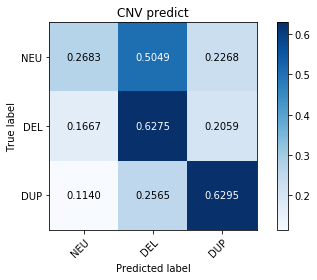

In [206]:
class_names=np.array(['NEU','DEL','DUP'])
plot_confusion_matrix(online_call_pd_predicable['truth'].values, 
                      pred_l,
                      classes=class_names, 
                      normalize=True,title='CNV predict')

In [207]:
from pandas_ml import ConfusionMatrix
# from pycm import ConfusionMatrix
confusion_matrix = ConfusionMatrix(online_call_pd_predicable['truth'].values, pred_l)
confusion_matrix.print_stats()

/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: RuntimeWarning: overflow encountered in long_scalars
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/zfssz2/ST_MCHRI/BIGDATA/USER/baiyong/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:61: RuntimeWarning: overflow encountered in long_scalars
  den = (np.float64(nis2 + njs2) / 2 - np.float64(nis2 * njs2) / n2)


Confusion Matrix:

Predicted      0      1      2  __all__
Actual                                 
0          35465  66750  29987   132202
1             17     64     21      102
2             48    108    265      421
__all__    35530  66922  30273   132725


Overall Statistics:

Accuracy: 0.269685439819175
95% CI: (0.2672991578445701, 0.272081787544334)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9999999999999999
Kappa: 0.00263974250900901
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         0            1           2
Population                                 132725       132725      132725
P: Condition positive                      132202          102         421
N: Condition negative                         523       132623      132304
Test outcome positive                       35530        66922       30273
Test outcome negative                       97195        65803      102452
TP: True Positive                           35465

In [165]:
# sample_id_arr = np.loadtxt(os.path.join(cnv_data_dir,'sample.list'), 
#                         delimiter='\t',usecols=(0,1),dtype='str')

# sample_id_dict=dict(zip(sample_id_arr[:,1],sample_id_arr[:,0]))

In [166]:
colors={0:'g', 1:'k', 2: 'r'}
legends={0:'NEU', 1: 'DEL', 2: 'DUP'}

Text(0.5,1,'HG01777, chr1, window size = 1kbp')

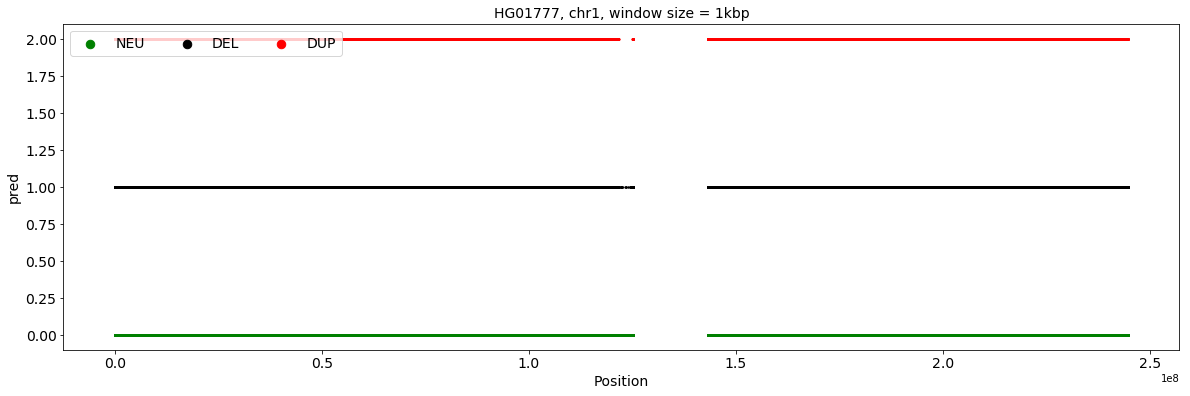

In [167]:
# bins=20
uni_preds = np.unique(online_call_pd_predicable['pred'].values)

color = [colors[int(x)] for x in online_call_pd_predicable['pred'].values]
plt.figure(figsize=(20,6))
for i in uni_preds:
    clr = colors[int(i)]
    partial_cnvs=online_call_pd_predicable[online_call_pd_predicable['pred']==i]
    tpred = [int(x) for x in partial_cnvs['pred'].values]
    plt.scatter(partial_cnvs['start'].values,
                tpred, c=clr,s=2, label=legends[int(i)])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Position',fontsize=14)
plt.ylabel('pred',fontsize=14)
plt.legend(frameon=True, loc='upper left', ncol=len(uni_preds), fontsize=14,markerscale=6)
plt.title(sample_id+', chr1, window size = 1kbp', fontsize=14)


[]


Text(0.5,1,'chr1:239,970,001-240,140,000 \n ID=DUP_uwash_chr1_240137922_240302859')

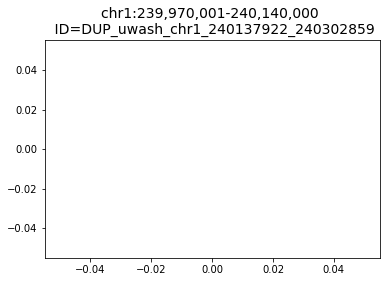

In [91]:
# false negative: DUP_uwash_chr1_240137922_240302859
exm_dup_start_pt = 239970001
exm_dup_end_pt = 240140000


partial_dat_df = online_call_pd_predicable[(online_call_pd_predicable['start']>=239070001)
                                           & (online_call_pd_predicable['start']<=242140000)]
tpred = [int(x) for x in partial_dat_df['pred'].values]
# exm_dup_mean_ratio = np.mean(pred_chr1_cnv[(pred_chr1_cnv['start']>=exm_dup_start_pt) & (pred_chr1_cnv['end']<=exm_dup_end_pt)]['copy'].values)
# print('exm_dup_mean_ratio',exm_dup_mean_ratio)
print(tpred)
plt.scatter(partial_dat_df['start'].values,tpred,c='g',s=3)
# plt.hlines(y=exm_dup_mean_ratio, xmin=exm_dup_start_pt, xmax=exm_dup_end_pt, color='r', linewidth=3)
# plt.axvline(x=exm_dup_start_pt, c='k',alpha=0.3)
# plt.axvline(x=exm_dup_end_pt, c='k',alpha=0.3)
# plt.xlabel('Position',fontsize=14)
# plt.ylabel('log 2 ratio',fontsize=14)
plt.title('chr1:239,970,001-240,140,000 \n ID=DUP_uwash_chr1_240137922_240302859', fontsize=14)

In [12]:
pred_chr1_cnv[(pred_chr1_cnv['gt_truth']==2)]

,copy,end,gc,maps,pred,reads,start,truth,ID,svlen,POS,END,TARGET_HET_GT,TARGET_HOM_GT,AF,gt_pred,gt_truth
85,-0.114759,1160000,0.5990,0.973370,1,561,1150001,DEL,DEL_pindel_12,206,1151437,1151643,"HG02009,0|1",NaN,0.0726837,1,2
297,0.153844,3580000,0.6152,0.963712,1,662,3570001,DEL,DEL_pindel_116,57,3571709,3571766,"HG02009,0|1",NaN,0.0636981,1,2
354,0.165321,4150000,0.4935,0.985754,1,759,4140001,DEL,DEL_pindel_129,50,4144607,4144657,"HG02009,0|1",NaN,0.485623,1,2
876,-0.158236,9370000,0.5497,0.995576,1,584,9360001,DEL,DEL_pindel_216,74,9366221,9366295,"HG02009,0|1",NaN,0.00019968,1,2
893,-0.514091,9540000,0.4988,0.945768,1,465,9530001,DEL,YL_CN_GBR_48,2509,9535301,9537810,NaN,"HG02009,1|1",0.219249,1,2
982,-0.376630,10430000,0.5052,0.846747,1,515,10420001,DEL,UW_VH_0,1291,10422442,10423733,NaN,"HG02009,1|1",0.329273,1,2
1516,-0.482993,15830000,0.4820,0.960185,1,483,15820001,DEL,YL_CN_FIN_64,3950,15825187,15829137,"HG02009,1|0",NaN,0.23742,1,2
1890,-0.067256,19630000,0.4448,0.980411,1,674,19620001,DEL,DEL_pindel_329,66,19628383,19628449,NaN,"HG02009,1|1",0.225639,1,2
2073,-0.045870,21460000,0.4125,0.745783,1,703,21450001,DEL,BI_GS_DEL1_B3_P0022_20,277,21459925,21460202,"HG02009,1|0",NaN,0.713858,1,2
2074,0.133644,21470000,0.4186,0.641653,1,792,21460001,DEL,BI_GS_DEL1_B3_P0022_20,277,21459925,21460202,"HG02009,1|0",NaN,0.713858,1,2


Text(0.5,0,'log2 ratio')

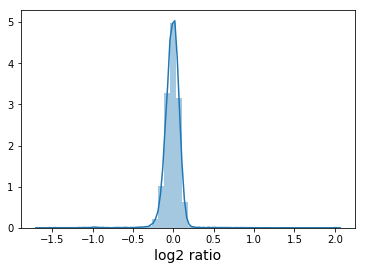

In [13]:
neu_pred_df = pred_chr1_cnv[(pred_chr1_cnv['gt_pred']==1) & (pred_chr1_cnv['gt_truth']==1)]
#false_pred_copys - flase_pred_df['copy'].values

neu_pred_df =  neu_pred_df['copy'].values

sns.distplot(neu_pred_df, kde=True)
plt.xlabel('log2 ratio', fontsize=14)

In [14]:
np.mean(neu_pred_df)-2*np.std(neu_pred_df),np.mean(neu_pred_df)+2*np.std(neu_pred_df)

(-0.257567530584511, 0.22583860573830877)

Text(0.5,0,'log2 ratio')

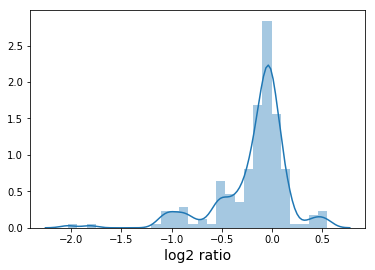

In [15]:
false_pred_df = pred_chr1_cnv[(pred_chr1_cnv['gt_pred']==1) & (pred_chr1_cnv['gt_truth']!=1)]
#false_pred_copys - flase_pred_df['copy'].values

false_pred_copy =  false_pred_df['copy'].values

sns.distplot(false_pred_copy, kde=True)
plt.xlabel('log2 ratio', fontsize=14)

In [17]:
i_false_count = false_pred_copy[(np.mean(neu_pred_df)-2*np.std(neu_pred_df)<false_pred_copy) 
                                & (false_pred_copy<np.mean(neu_pred_df)+2*np.std(neu_pred_df))]
len(i_false_count)*1.0/len(false_pred_copy)

0.6951871657754011

[[Text(0,0,'DEL'), Text(0,0,'DUP'), Text(0,0,'DUP/DEL')]]

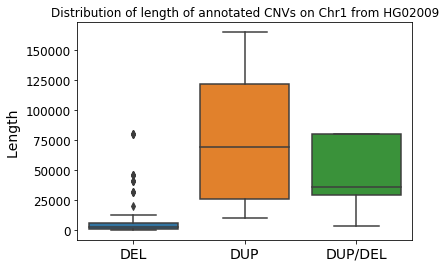

In [18]:



ax = sns.boxplot(x='truth', y='svlen', data=pred_chr1_cnv[pred_chr1_cnv['truth']!='NEU'])
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Length ',fontsize=14)
plt.title('Distribution of length of annotated CNVs on Chr1 from HG02009')
ax.set(xticklabels=['DEL','DUP','DUP/DEL'])


[[Text(0,0,'DEL'), Text(0,0,'DUP'), Text(0,0,'DUP/DEL')]]

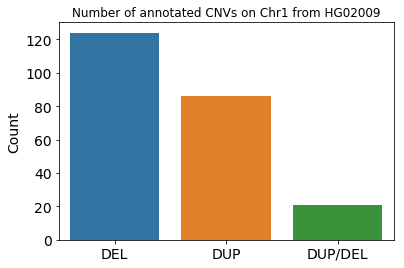

In [19]:
ax = sns.countplot(x="truth", data=pred_chr1_cnv[pred_chr1_cnv['truth']!='NEU'])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Count',fontsize=14)
plt.title('Number of annotated CNVs on Chr1 from HG02009')
ax.set(xticklabels=['DEL','DUP','DUP/DEL'])

Text(0.5,1,'HG02009, chr1, window size = 10kbp')

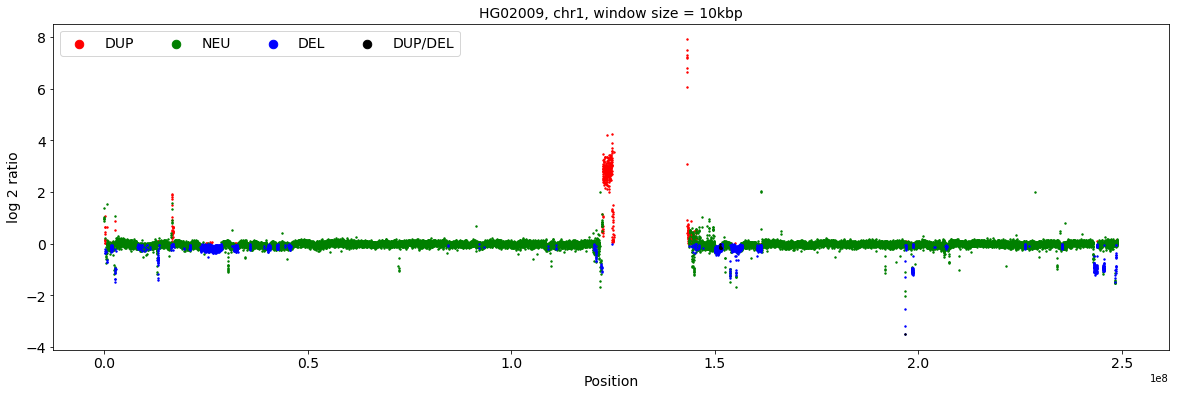

In [183]:




# plt.axvline(x=exm_dup_start_pt, c='k',alpha=0.3)
# plt.axvline(x=exm_dup_end_pt, c='k',alpha=0.3)
# plt.title('HG01136,chr1',fontsize=14)
#plt.xlim([3190000, 11630000])
#plt.hlines(y=test_cnvs_labs,xmin=test_cnvs_starts,xmax=test_cnvs_ends)

exm_dup_mean_ratio 0.032515601648457675


Text(0.5,1,'chr1:239,970,001-240,140,000 \n ID=DUP_uwash_chr1_240137922_240302859')

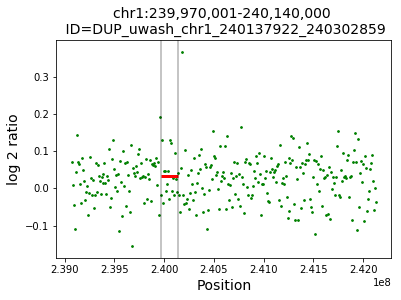

In [35]:
# false negative: DUP_uwash_chr1_240137922_240302859
exm_dup_start_pt = 239970001
exm_dup_end_pt = 240140000


partial_dat_df = pred_chr1_cnv[(pred_chr1_cnv['start']>=239070001) & (pred_chr1_cnv['start']<=242140000)]

exm_dup_mean_ratio = np.mean(pred_chr1_cnv[(pred_chr1_cnv['start']>=exm_dup_start_pt) & (pred_chr1_cnv['end']<=exm_dup_end_pt)]['copy'].values)
print('exm_dup_mean_ratio',exm_dup_mean_ratio)
plt.scatter(partial_dat_df['start'].values,partial_dat_df['copy'].values,c='g',s=3)
plt.hlines(y=exm_dup_mean_ratio, xmin=exm_dup_start_pt, xmax=exm_dup_end_pt, color='r', linewidth=3)
plt.axvline(x=exm_dup_start_pt, c='k',alpha=0.3)
plt.axvline(x=exm_dup_end_pt, c='k',alpha=0.3)
plt.xlabel('Position',fontsize=14)
plt.ylabel('log 2 ratio',fontsize=14)
plt.title('chr1:239,970,001-240,140,000 \n ID=DUP_uwash_chr1_240137922_240302859', fontsize=14)


exm_dup_mean_ratio -0.7685753820498046


Text(0.5,1,'chr1:239,970,001-240,140,000 \n ID=DUP_uwash_chr1_240137922_240302859')

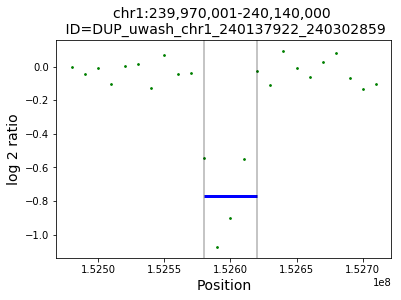

In [55]:
# false negative: DUP_uwash_chr1_240137922_240302859
exm_del_start_pt1 = 152580001 #120950001
exm_del_end_pt1 = 152620000


partial_dat_df = pred_chr1_cnv[(pred_chr1_cnv['start']>=152480001) & (pred_chr1_cnv['start']<=152720000)]


exm_del_mean_ratio = np.mean(pred_chr1_cnv[(pred_chr1_cnv['start']>=exm_del_start_pt1) & (pred_chr1_cnv['end']<=exm_del_end_pt1)]['copy'].values)
print('exm_dup_mean_ratio',exm_del_mean_ratio)
plt.scatter(partial_dat_df['start'].values,partial_dat_df['copy'].values,c='g',s=3)
plt.hlines(y=exm_del_mean_ratio, xmin=exm_del_start_pt1, xmax=exm_del_end_pt1, color='b', linewidth=3)
plt.axvline(x=exm_del_start_pt1, c='k',alpha=0.3)
plt.axvline(x=exm_del_end_pt1, c='k',alpha=0.3)
plt.xlabel('Position',fontsize=14)
plt.ylabel('log 2 ratio',fontsize=14)
plt.title('chr1:152,580,001-152,620,000 \n ID=BI_GS_CNV_1_152555495_152586932', fontsize=14)

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pandas_ml import ConfusionMatrix
from sklearn.utils.multiclass import unique_labels

In [95]:
#  calculate 
def get_cls_reports(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    
    # Precision or positive predictive value
    PPV = TP/(TP+FP)

    # Negative predictive value
    NPV = TN/(TN+FN)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate or Miss Rate
    FNR = FN/(TP+FN)
    
    # False discovery rate
    FDR = FP/(TP+FP)
    
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    return (TPR, TNR, PPV,NPV,FPR,FNR,FDR,ACC)

In [ ]:
def get_cls_reports2(y_true,y_pred,target_labs = [0,2,3]):
    # for 
    

In [96]:

cnv_size=[500,1000,5000,10000,20000,60000]
TPR_lst=[];
FDR_lst=[]
for i_cnv_size in cnv_size:
    tmp_only_cnvs = pred_chr1_cnv[pred_chr1_cnv['svlen']>=i_cnv_size]
    (TPR, TNR, PPV,NPV,FPR,FNR,FDR,ACC) = get_cls_reports(tem_df['gt_truth'].values,
                                                          tem_df['gt_pred'].values)

    TPR_lst.append(TPR)
    FDR_lst.append(FDR)
#specificity = tn / (tn+fp)

In [97]:
TPR_lst

[array([0.27, 0.91, 0.09, 0.48]),
 array([0.27, 0.91, 0.12, 0.48]),
 array([0.27, 0.91, 0.14, 0.53]),
 array([0.27, 0.91, 0.13, 0.56]),
 array([0.28, 0.91, 0.18, 0.62]),
 array([0.29, 0.91, 0.75, 1.  ])]

In [98]:
FDR_lst

[array([0.95, 0.01, 0.99, 0.  ]),
 array([0.95, 0.01, 0.99, 0.  ]),
 array([0.95, 0.  , 1.  , 0.  ]),
 array([0.95, 0.  , 1.  , 0.  ]),
 array([0.96, 0.  , 1.  , 0.  ]),
 array([0.97, 0.  , 1.  , 0.  ])]

In [88]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.27 0.72 0.01 0.  ]
 [0.02 0.91 0.07 0.  ]
 [0.   0.92 0.08 0.  ]
 [0.   0.52 0.   0.48]]
Confusion Matrix:

Predicted    0      1     2   3  __all__
Actual                                  
0           23     62     1   0       86
1          440  20687  1585   0    22712
2            0    114    10   0      124
3            0     11     0  10       21
__all__    463  20874  1596  10    22943


Overall Statistics:

Accuracy: 0.9035435644858998
95% CI: (0.8996504867866881, 0.9073340644231542)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.9995160489953606
Kappa: 0.024593573603564536
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         0           1            2  \
Population                                  22943       22943        22943   
P: Condition positive                          86       22712          124   
N: Condition negative                       22857         231        22819   
Test outcome pos

/media/project_workspace/baiyong/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:330: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


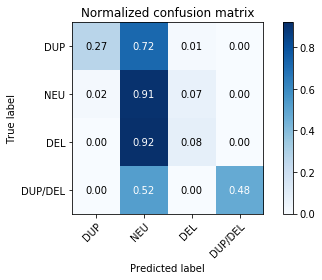

In [89]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plot_confusion_matrix(y_test, y_pred, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
class_names=np.array(['DUP','NEU','DEL','DUP/DEL'])

y_true = pred_chr1_cnv['gt_truth'].values
y_pred = pred_chr1_cnv['gt_pred'].values
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,title='Normalized confusion matrix')

from pandas_ml import ConfusionMatrix
# from pycm import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_true, y_pred)
confusion_matrix.print_stats()